<a href="https://colab.research.google.com/github/sahug/tensorflow-colab/blob/master/Tensorflow_2_0_Multi_Label_Image_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multi-Label Classification classifies in to multiple labels. 

In [2]:
!pip install tensorflow-gpu==2.0.0

Movie poster link - https://www.cs.ccu.edu.tw/~wtchu/projects/MoviePoster/

In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential

In [4]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D

In [5]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [6]:
print(tf.__version__)

2.0.0


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [9]:
# Clonning data from repository
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

fatal: destination path 'Movies-Poster_Dataset' already exists and is not an empty directory.


In [10]:
data = pd.read_csv("/content/Movies-Poster_Dataset/train.csv")
data.shape

(7254, 27)

In [11]:
data.head() #ID Correspondes to Image Name in the Images Directory

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [12]:
# For Processing we need the data/image in same size. Converting all images to same size
img_width = 200
img_height = 200

x = []

for i in tqdm(range(data.shape[0])):
  path = "/content/Movies-Poster_Dataset/Images/" + data["Id"][i] + ".jpg"
  img = image.load_img(path, target_size=(img_width, img_height, 3)) #Reshapping image. 3 is for color.
  img = image.img_to_array(img) #Converting image to array
  img = img/255.0 #Bringing down variance to common difference
  x.append(img)  

x = np.array(x)

100%|██████████| 7254/7254 [00:24<00:00, 291.61it/s]


In [13]:
x.shape

(7254, 200, 200, 3)

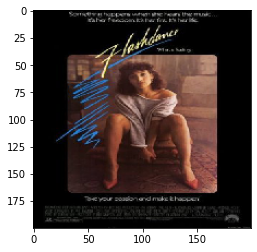

In [14]:
plt.imshow(x[1])

In [15]:
data["Genre"][1]

"['Drama', 'Romance', 'Music']"

In [16]:
# Prepare Train and Test Data
y = data.drop(["Id", "Genre"], axis = 1)
y = y.to_numpy()
y.shape

(7254, 25)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)

## Build **CNN**

In [18]:
model = Sequential()

# Layer 1
model.add(Conv2D(16, (3, 3), activation="relu", input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.3))

# Layer 2
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.3))

# Layer 3
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.4))

# Layer 4
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25, activation="sigmoid"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 198, 198, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 97, 97, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0

In [20]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [21]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/5
6165/6165 [==============================] - 17s 3ms/sample - loss: 0.6918 - accuracy: 0.6465 - val_loss: 0.6658 - val_accuracy: 0.6936
Epoch 2/5
6165/6165 [==============================] - 8s 1ms/sample - loss: 0.3044 - accuracy: 0.8933 - val_loss: 0.3680 - val_accuracy: 0.9063
Epoch 3/5
6165/6165 [==============================] - 8s 1ms/sample - loss: 0.2597 - accuracy: 0.9077 - val_loss: 0.8284 - val_accuracy: 0.7542
Epoch 4/5
6165/6165 [==============================] - 8s 1ms/sample - loss: 0.2495 - accuracy: 0.9109 - val_loss: 0.2750 - val_accuracy: 0.9081
Epoch 5/5
6165/6165 [==============================] - 8s 1ms/sample - loss: 0.2434 - accuracy: 0.9123 - val_loss: 0.2585 - val_accuracy: 0.9085


In [22]:
history.history

{'accuracy': [0.64653385, 0.8933073, 0.90768516, 0.91089714, 0.9123184],
 'loss': [0.6918025050526795,
  0.30437198620159645,
  0.2597434175662267,
  0.24953268522280364,
  0.24335214602492827],
 'val_accuracy': [0.69359046, 0.9062626, 0.7542333, 0.90809935, 0.90853995],
 'val_loss': [0.6658450778303505,
  0.36803935529771914,
  0.8283816094350334,
  0.2750476851607814,
  0.2584531210342386]}

In [23]:
epoch_range = range(1, 6)

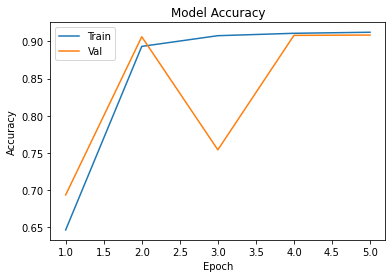

In [24]:
# Plot training and validation accuracy values
# sparse_categorical_accuracy vs val_sparse_categorical_accuracy
plt.plot(epoch_range, history.history["accuracy"])
plt.plot(epoch_range, history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

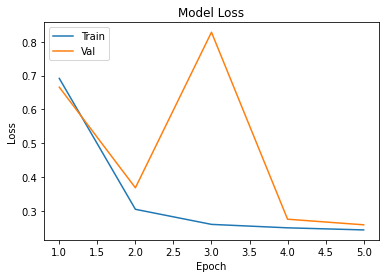

In [25]:
# Plot training and validation loss values
# Loss vs Val_Loss
plt.plot(epoch_range, history.history["loss"])
plt.plot(epoch_range, history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

### **Making Predictions**

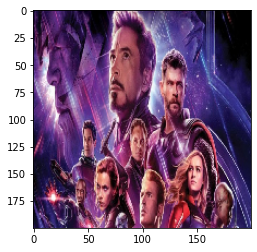

In [27]:
img = image.load_img("/content/Movies-Poster_Dataset/endgame.jpg", target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1, img_width, img_height, 3)


In [28]:
classes = data.columns[2:]
classes

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [30]:
y_prob = model.predict(img)
y_prob, y_prob[0]

(array([[0.06253126, 0.40118057, 0.66184765, 0.17357776, 0.50909424,
         0.04816937, 0.26862848, 0.2204195 , 0.2977235 , 0.44586748,
         0.05699524, 0.19563594, 0.07171252, 0.03992626, 0.1314385 ,
         0.00327677, 0.08805102, 0.27275318, 0.13566643, 0.06027585,
         0.00420234, 0.03737924, 0.10204783, 0.0117583 , 0.07477887]],
       dtype=float32),
 array([0.06253126, 0.40118057, 0.66184765, 0.17357776, 0.50909424,
        0.04816937, 0.26862848, 0.2204195 , 0.2977235 , 0.44586748,
        0.05699524, 0.19563594, 0.07171252, 0.03992626, 0.1314385 ,
        0.00327677, 0.08805102, 0.27275318, 0.13566643, 0.06027585,
        0.00420234, 0.03737924, 0.10204783, 0.0117583 , 0.07477887],
       dtype=float32))

In [34]:
#Sorting and getting top 3 predictions
top_3_predictions = np.argsort(y_prob[0])[:-4:-1]
top_3_predictions

array([2, 4, 9])

In [35]:
for i in range(3):
  print(classes[top_3_predictions[i]])

Animation
Comedy
Fantasy
